In [1]:
# Install necessary packages - run this cell once to install numpy, scipy, and lmfit.
# We use pip rather than conda because lmfit is not a conda package.
# This cell might take a minute or two to execute.
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install lmfit
!{sys.executable} -m pip install matplotlib

In [2]:
# Import necessary libraries: numpy, scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy
import lmfit

In [32]:
# These parameters are used for the simulation.
# They define the properties of the simulated resonator.
SIMULATION_F_0 = 5.55
SIMULATION_Q = 10000
SIMULATION_NOISE_SCALE = 0.02

In [33]:
# This function is a way of describing a linear resonator in terms of its Q factors and f_0.
def linear_resonator(f, f_0, Q, Q_e_real, Q_e_imag):
    Q_e = Q_e_real + 1j*Q_e_imag
    return 1 - (Q * Q_e**-1 / (1 + 2j * Q * (f - f_0) / f_0))

In [34]:
# Here we create a ResonatorModel to simulate the resonator.
# lmfit provides some helpful functions.
class ResonatorModel(lmfit.model.Model):
    __doc__ = "resonator model" + lmfit.models.COMMON_INIT_DOC

    def __init__(self, *args, **kwargs):
        # pass in the defining equation so the user doesn't have to later
        super().__init__(linear_resonator, *args, **kwargs)

        self.set_param_hint('Q', min=0)  # enforce Q is positive

In [35]:
def measure_simulated_resonator(measurement_axis):
    """Measure the simulated resonator.
    
    Arguments:
      - measurement_axis: a numpy array containing a set of frequencies to measure at.
      
    Returns:
      - measured_s21: a numpy array containing values corresponding to the complex response of the resonator.
    """
    # Here we set up the simulation.
    # I have provided some typical values for the resonator.
    # f_0 is in GHz, whilst the Q factors are unitless.
    resonator = ResonatorModel()
    true_params = resonator.make_params(f_0 = SIMULATION_F_0, 
                                        Q = SIMULATION_Q, 
                                        Q_e_real = SIMULATION_Q*0.9, 
                                        Q_e_imag = -SIMULATION_Q*0.9)

    true_s21 = resonator.eval(params=true_params, f=measurement_axis)
    noise_scale = SIMULATION_NOISE_SCALE
    np.random.seed(123)
    measured_s21 = true_s21 + noise_scale*(np.random.randn(len(measurement_axis)) + 1j*np.random.randn(len(measurement_axis)))
    return measured_s21

In [36]:
# Try measuring the resonator! When performing a measurement, 
# typically we provide a `start`, a `stop`, and a number of `points`, 
# which determines the resolution of the measurement.

start = 5.0 # GHz
stop = 6.0 # GHz
num_points = 100

# Create a numpy array that holds these values
measurement_axis = np.linspace(start, stop, num_points)

# In the lab, we would generate a signal from an AWG (arbitrary waveform generator) or VNA (vector network analyser)
# and send it to the resonator, which is inside a cryostat.
# We vary the frequency of this signal - called a sweep - in order to test the response of the resonator
# at different input frequencies.
# We are trying to determine which frequency signal we should send when we want to measure the qubit.
# Note that there is no qubit in this experiment yet!

# We simulate the experiment by evaluating the linear resonator equation at each point in `measurement_axis`. 
response = measure_simulated_resonator(measurement_axis)

print(response)

[0.97856755+1.25606494e-02j 1.02023231-3.98434526e-02j
 1.00595041+1.39541490e-02j 0.97017059+5.16692730e-02j
 0.98873036-7.95211535e-04j 1.0333372 +3.74026106e-04j
 0.95178125+3.27579569e-03j 0.99174322-3.75613547e-02j
 1.02564711+8.19415946e-03j 0.9830008 -3.24442063e-02j
 0.98676543-8.89716738e-03j 0.99845686+2.45059032e-02j
 1.0301871 -1.50641123e-02j 0.98758993+9.65652119e-03j
 0.99149742+1.98772073e-02j 0.99169959+5.18766576e-03j
 1.04451526-2.78161969e-02j 1.04414297-7.05734764e-03j
 1.02049949+3.87691872e-02j 1.00815393-4.09317846e-02j
 1.01519005-5.95910668e-03j 1.03027054-1.14988139e-02j
 0.98175326+1.94421042e-03j 1.02400145+1.44785947e-02j
 0.97542317+3.16721360e-02j 0.98776274-5.92338211e-03j
 1.01867805+1.57098416e-02j 0.97198184+9.43823606e-03j
 0.99777506+8.90931511e-03j 0.98336396-1.18788306e-02j
 0.99551114-2.05713631e-02j 0.94467831-2.26524767e-02j
 0.96524835-1.58094192e-02j 0.98671308+5.72128291e-03j
 1.01929458+1.44716541e-02j 0.99731088+5.68356578e-03j
 1.0008829

In [37]:
# You will notice that the response is complex. You can use the following `numpy` functions to access the different values:

I = response.real
print("I: %s" %I)
# The real part of the complex signal corresponds to the in-phase component of the return wave, or the "I" value.

Q = response.imag
print("Q: %s" %Q)
# The imaginary part of the signal corresponds to the quadrature component of the return wave, or the "Q" value.

Magnitude = np.abs(response)
print("Magnitude: %s" %Magnitude)
# Calculating the magnitude of the signal is as simple as taking the absolute value.

I: [0.97856755 1.02023231 1.00595041 0.97017059 0.98873036 1.0333372
 0.95178125 0.99174322 1.02564711 0.9830008  0.98676543 0.99845686
 1.0301871  0.98758993 0.99149742 0.99169959 1.04451526 1.04414297
 1.02049949 1.00815393 1.01519005 1.03027054 0.98175326 1.02400145
 0.97542317 0.98776274 1.01867805 0.97198184 0.99777506 0.98336396
 0.99551114 0.94467831 0.96524835 0.98671308 1.01929458 0.99731088
 1.00088292 1.01463772 0.98333553 1.00665865 0.98494689 0.96657905
 0.9934052  1.01280588 1.00822846 1.00137376 1.04964763 1.01029932
 1.02193088 1.04754914 0.97752676 0.98361264 1.04103321 0.99436147
 1.03232147 0.99232272 1.00779597 1.02904865 1.02558058 1.01801333
 0.98178228 1.01355737 1.00425659 0.97168389 1.02674323 1.01469429
 0.99958524 0.99411937 0.97490531 1.00293954 1.00838554 0.98245317
 1.02237306 0.97723195 0.95675621 1.02005085 0.99122354 0.99680176
 0.98260082 0.96725836 1.02450675 0.98564717 1.03266451 1.01561106
 0.99318786 0.97778191 0.98486658 0.97528025 1.04128698 1.00

Text(0.5, 1.0, 'Q')

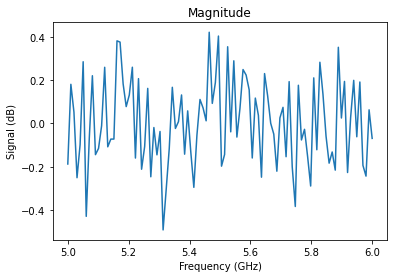

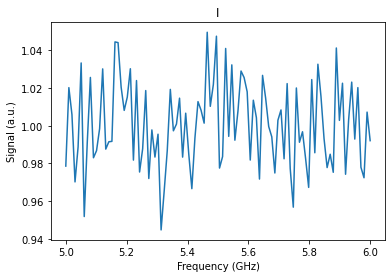

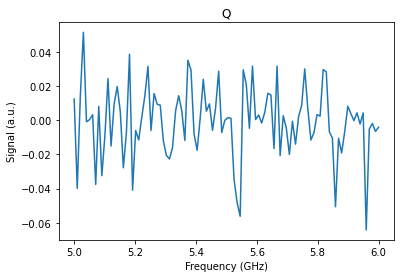

In [41]:
# We can visualise the response by plotting the data against the measurement axis.

# Note that here we convert the response to decibels by multiplying by `20*np.log10`.
plt.plot(measurement_axis, 20*np.log10(Magnitude))

plt.ylabel('Signal (dB)')
plt.xlabel('Frequency (GHz)')
plt.title('Magnitude')

plt.figure()
plt.plot(measurement_axis, I)
plt.ylabel('Signal (a.u.)')
plt.xlabel('Frequency (GHz)')
plt.title('I')

plt.figure()
plt.plot(measurement_axis, Q)
plt.ylabel('Signal (a.u.)')
plt.xlabel('Frequency (GHz)')
plt.title('Q')

In [39]:
# The above plots should just look like noise.
# There is a resonance somewhere within this window.
# Based on calculations made whilst designing the QPU chip, the resonance should be located around 5.5 GHz.
# Try playing around with the window start and stop, and the number of points, to locate it, and see what shape it takes.
# This manual step of finding the resonance by eye is typically the first port of call for a quantum engineer.

In [40]:
# As a second exercise, now try to extract the resonance frequency, `f_0`, from the data.
# This is located at the resonance dip.
# In order to calibrate a quantum computer efficiently, we need to be able to do this programatically.

In [42]:
# Finally, try applying a fit to the response.
# You can use the function `linear_resonator` as your input.
# Try using a fitting function, such as `scipy.optimize`.
# You can also try other functions as an input to the optimizer. 
# Does a gaussian function give a good approximation? How about a Lorentzian?